In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Đọc dữ liệu từ file gold_clean.csv

In [234]:
df = pd.read_csv('gold_clean.csv', index_col=0)
df


,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD
...,...,...,...,...,...,...,...
5697,2022-08-26,1771.8,1772.3,1746.2,1749.8,176904,USD
5698,2022-08-29,1748.4,1757.9,1731.4,1749.7,156220,USD
5699,2022-08-30,1749.8,1752.8,1732.9,1736.3,130664,USD
5700,2022-08-31,1735.5,1738.0,1720.6,1726.2,176731,USD


## Phân tích giá mở cửa từ năm 2000 đến năm 2022

C:\Users\yukih\AppData\Local\Temp\ipykernel_26164\2675846878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open['Date'] = open['Date'].str[:4]


Text(0.5, 1.0, 'Giá mở cửa trung bình từ năm 2000 đến năm 2022')

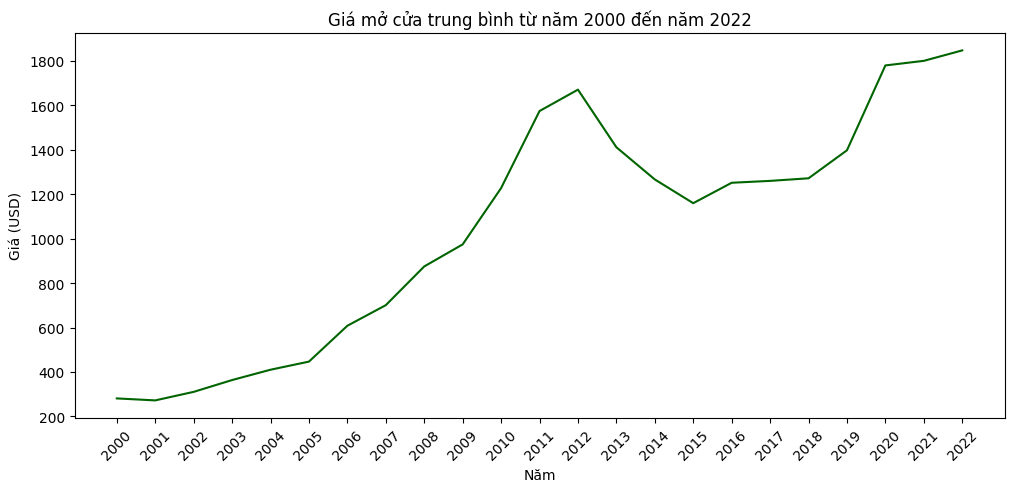

In [235]:
# Tính giá vàng mở cửa trung bình theo từng năm
open=df[['Date', 'Open']]
open['Date'] = open['Date'].str[:4]
open_by_year = open.groupby(by = 'Date', axis=0).mean()

# Trực quan bằng biểu đồ đường để thấy sự thay đổi theo từng năm
plt.figure(figsize=(12,5))
plt.plot(open_by_year, color='darkgreen')
plt.xticks(rotation=45)
plt.xlabel("Năm")
plt.ylabel("Giá (USD)")
plt.title("Giá mở cửa trung bình từ năm 2000 đến năm 2022")


## Phân tích số lượng giao dịch trung bình theo từng năm

C:\Users\yukih\AppData\Local\Temp\ipykernel_26164\1500389321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol['Date'] = vol['Date'].str[:4]


Text(0.5, 1.0, 'Số lượng vàng giao dịch trung bình theo từng năm từ năm 2000 đến năm 2022')

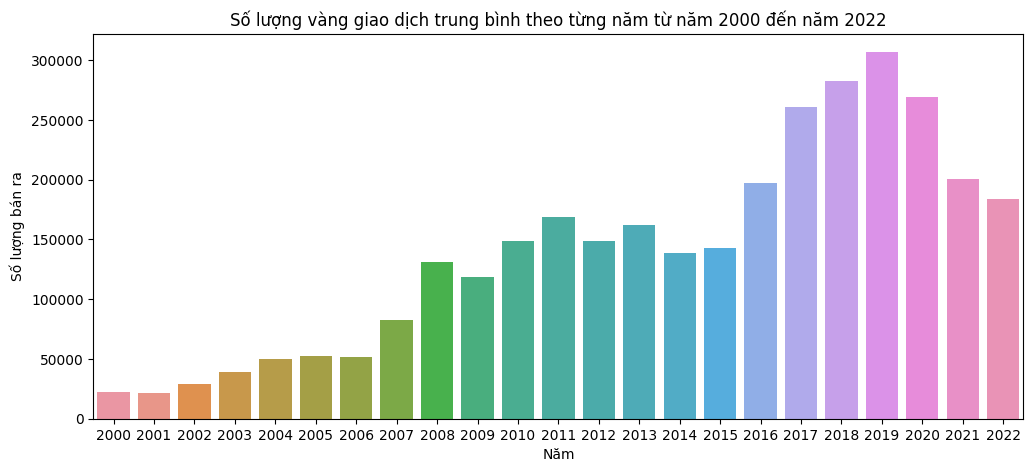

In [236]:
# Tính số lượng trung bình bán ra theo từng năm
vol=df[['Date', 'Volume']]
vol['Date'] = vol['Date'].str[:4]
vol_by_year = vol.groupby(by = 'Date', axis=0, as_index=False).mean()
vol_by_year

# Trực quan bằng biểu đồ cột đứng để thấy sự thay đổi theo từng năm
plt.figure(figsize=(12,5))
sns.barplot(x='Date', y='Volume', data=vol_by_year)
plt.xlabel("Năm")
plt.ylabel("Số lượng bán ra")
plt.title("Số lượng vàng giao dịch trung bình theo từng năm từ năm 2000 đến năm 2022")

In [237]:
vol2=df[['Date', 'Volume']]
vol2['Date'] = vol2['Date'].str[:4]
vol_by_year2 = vol2.groupby(by = 'Date', axis=0, as_index=False).mean()
vol_by_year2

C:\Users\yukih\AppData\Local\Temp\ipykernel_26164\429787841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol2['Date'] = vol2['Date'].str[:4]


,Date,Volume
0,2000,22782.544355
1,2001,21801.037037
2,2002,29307.008097
3,2003,39509.540000
4,2004,49987.220884
5,2005,52873.278884
6,2006,51560.015936
7,2007,82371.539062
8,2008,131394.364706
9,2009,118224.761905


##### Sự tăng giảm số lượng giao dịch theo từng năm

In [238]:
vol2=df[['Date', 'Volume']]
vol2['Date'] = vol2['Date'].str[:4]
vol_by_year2 = vol2.groupby(by = 'Date', axis=0, as_index=False).mean()
vol_by_year2
temp = {}

for i in range(0, 22):
    temp[i] = vol_by_year2.iloc[i+1, 1] - vol_by_year2.iloc[i, 1]
for i in range(0, 22):
    print(temp[i])


-981.5073178016719
7505.971060128955
10202.531902834009
10477.680883534136
2886.0580009280166
-1313.2629482071716
30811.523126245018
49022.825643382355
-13169.602801120447
30363.694444444453
19920.226190476184
-19559.511904761923
13356.440476190503
-23269.388888888905
4099.8015873015975
54296.65873015873
63325.580408524635
21734.951337507082
24386.283722253866
-37396.470339983935
-69005.88877909532
-16868.984126984113


C:\Users\yukih\AppData\Local\Temp\ipykernel_26164\4044921309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vol2['Date'] = vol2['Date'].str[:4]


## Tìm mối tương quan giữa giá mở cửa và số lượng giao dịch

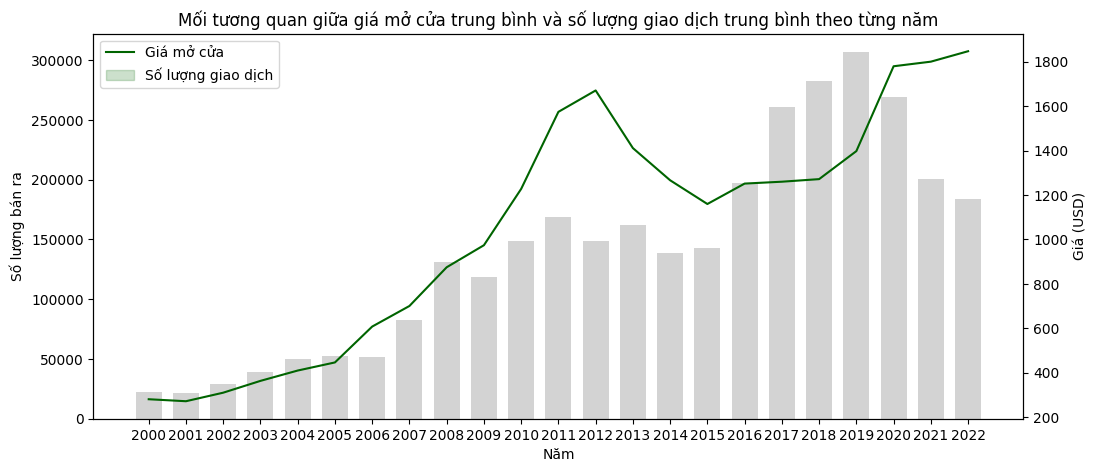

In [239]:
#Tạo biểu đồ
fig, plot1 = plt.subplots(figsize=(12,5))
plot2 = plot1.twinx()

sns.barplot(x='Date', y='Volume', data=vol_by_year, color='lightgrey', ax=plot1, label='Số lượng giao dịch', width=0.7)
sns.lineplot(x='Date', y='Open', data=open_by_year, color='darkgreen', ax=plot2, label='Giá mở cửa')

# Chỉnh sửa biểu đồ
plot1.set_xlabel("Năm")
plot1.set_ylabel("Số lượng bán ra")
plot2.set_ylabel("Giá (USD)")
plot1.set_label("Số lượng bán ra")
plot2.set_label("Giá mở cửa")
plt.title("Mối tương quan giữa giá mở cửa trung bình và số lượng giao dịch trung bình theo từng năm")
plt.legend(['Giá mở cửa', 'Số lượng giao dịch'])
plt.show()